In [1]:
#Librerias utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import datetime

In [2]:
#Lectura de los archivos de datos
df1 = pd.DataFrame( pd.read_csv("meteo-nogal-09.csv", engine="python" ) )
df2 = pd.DataFrame( pd.read_csv("soil-nogal-09.csv", engine="python" ) )

In [3]:
df1.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Se eliminan las columnas innecesarias para el análisis (Unnamed)
df1.drop( df1.columns[18:36], axis=1, inplace=True )
df1.drop( df1.columns[2:4], axis=1, inplace=True )
df1.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [6]:
#Se crea una nueva columna "FECHA" a partir de las columnas "DATE" y "TIME"
df1["FECHA"] = df1["DATE"] + " "+ df1["TIME"]
#Se eliminan las columnas "DATE" y "TIME"
df1.drop( ["DATE","TIME"], axis=1, inplace=True )
df1.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3,NaN
1,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
2,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
3,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
4,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40


In [7]:
#Se elimina el 1er renglón, que contiene las unidades en las que se miden las variables
df1 = df1.drop(df1.index[0]).reset_index(drop=True)
df1.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,01-01-09 00:50


In [8]:
#Se convierten las variables de object a float64
df1[df1.columns[0:14]] = df1[df1.columns[0:14]].apply(pd.to_numeric, errors='coerce')

In [9]:
df1.dtypes

u_Avg          float64
v_Avg          float64
w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
FECHA           object
dtype: object

In [10]:
df2.dtypes

id                        int64
2 Year_RTM  L             int64
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L      int64
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [11]:
df2.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df1.dtypes

u_Avg          float64
v_Avg          float64
w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
FECHA           object
dtype: object

In [13]:
#Se toman las columnas relevantes para el análisis
#df2 = df2.filter( items=["2 Year_RTM  L", "3 Day_RTM  L", "4 Hour_Minute_RTM  L", "Tsuelo_10cm", "Tsuelo_20cm", "Tsuelo_40cm", "Tsuelo_85cm"], axis=1)
#df2.head()

In [14]:
df2.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Convertir las variables de int a string
df2["2 Year_RTM  L"] = df2["2 Year_RTM  L"].astype(str)  
#df2["3 Day_RTM  L"] = df2["3 Day_RTM  L"].astype(str)
df2["4 Hour_Minute_RTM  L"] = df2["4 Hour_Minute_RTM  L"].astype(str)

df2.dtypes

id                        int64
2 Year_RTM  L            object
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L     object
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [16]:
df1.head(1000)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.950000,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000,01-01-09 00:10
1,0.892,0.588,-0.072,10.810000,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000,01-01-09 00:20
2,1.227,0.685,-0.069,10.340000,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
3,1.135,0.741,-0.093,9.800000,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000,01-01-09 00:40
4,0.755,1.064,-0.149,8.870000,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000,01-01-09 00:50
5,0.885,0.992,-0.167,8.760000,1.450,-183.4,23.33,-26.98,1.390,8.340000,0.840,1.097,0.921,7.089000,01-01-09 01:00
6,0.611,0.727,-0.126,8.720000,1.500,-180.6,23.71,-26.72,0.982,8.160000,0.832,1.084,0.901,6.943000,01-01-09 01:10
7,0.330,0.886,-0.086,8.800000,1.490,-185.3,23.63,-26.65,0.996,7.888000,0.838,1.064,0.892,6.878000,01-01-09 01:20
8,0.118,1.321,-0.071,8.690000,1.422,-187.8,24.04,-27.16,1.338,7.539001,0.846,1.039,0.879,6.787000,01-01-09 01:30
9,0.056,1.315,-0.081,7.892000,1.324,-186.5,23.63,-25.91,1.331,7.163000,0.876,1.012,0.886,6.852000,01-01-09 01:40


In [17]:
#df2["FECHA"] = pd.to_datetime(df2["2 Year_RTM  L"], format='%Y') + pd.to_timedelta(df2["3 Day_RTM  L"] - 1, unit='d')
#df2["FECHA"] = df2.datetime.strptime( df2["3 Day_RTM  L"], '%j').date()
#df2["FECHA"] = df2["3 Day_RTM  L"].datetime()
#df2.head()
#%j

In [18]:
#df2["FECHA"] = pd.DatetimeIndex(df2['3 Day_RTM  L'].apply(lambda x: date(2000, 1, 1)+ relativedelta(days=int(x)-1)))
#df2["FECHA"] = pd.to_datetime(df2['2 Year_RTM  L'] * 1000 + df2['3 Day_RTM  L'], format='%Y%j')

In [19]:
#Convertimos nuestra variable DATETIME en una variable FECHA del tipo date
df1['DATETIME'] = pd.to_datetime(df1.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df1 = df1.drop(['FECHA'], 1)
df1.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000,2009-01-01 00:10:00
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000,2009-01-01 00:20:00
2,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00
3,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000,2009-01-01 00:40:00
4,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000,2009-01-01 00:50:00


In [20]:
#De la variable FECHA, se crea una nueva variable que contabiliza los minutos transcurridos
df1['MINUTOS'] = df1['DATETIME'].dt.minute
df1.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME,MINUTOS
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000,2009-01-01 00:10:00,10.0
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000,2009-01-01 00:20:00,20.0
2,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,30.0
3,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000,2009-01-01 00:40:00,40.0
4,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000,2009-01-01 00:50:00,50.0


In [21]:
#De df1 se toman solamente los valores de cada media hora y del año 2009
df1 = df1[((df1["MINUTOS"] == 30.0) | (df1["MINUTOS"] == 0.0)) & (df1["DATETIME"] < '2010-01-01 00:30:00')]
df1 = df1.reset_index(drop=True)
df1.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME,MINUTOS
0,1.227,0.685,-0.069,10.340,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,30.0
1,0.885,0.992,-0.167,8.760,1.450,-183.4,23.33,-26.98,1.390,8.340000,0.840,1.097,0.921,7.089000,2009-01-01 01:00:00,0.0
2,0.118,1.321,-0.071,8.690,1.422,-187.8,24.04,-27.16,1.338,7.539001,0.846,1.039,0.879,6.787000,2009-01-01 01:30:00,30.0
3,0.755,1.193,-0.149,7.612,1.360,-174.0,20.87,-21.68,1.457,6.760000,0.902,0.985,0.888,6.876000,2009-01-01 02:00:00,0.0
4,1.080,0.839,-0.149,7.761,1.404,-170.7,18.15,-21.55,1.422,7.288001,0.845,1.021,0.863,6.669000,2009-01-01 02:30:00,30.0


In [22]:
df2.dtypes

id                        int64
2 Year_RTM  L            object
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L     object
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [23]:
#Llenamos una lista de horas y minutos para cada dato

#Horas
h=[]

#Minutos
m=[]

for i in range ( 0, len(df2) ):
    
    if ( len( str( df2['4 Hour_Minute_RTM  L'][i] ) ) == 4 ):
        if ( str( df2['4 Hour_Minute_RTM  L'][i] )[0:2] == '24' ):
            h.append('00')
            m.append('00')
        else:
            h.append( str( df2['4 Hour_Minute_RTM  L'][i] )[0:2] )
            m.append( str( df2['4 Hour_Minute_RTM  L'][i] )[2:4] )
            
    elif ( len( str( df2['4 Hour_Minute_RTM  L'][i] ) ) == 3 ):
            h.append( str( df2['4 Hour_Minute_RTM  L'][i] )[0:1] )
            m.append( str( df2['4 Hour_Minute_RTM  L'][i] )[1:3] )
            
    elif ( len( str( df2['4 Hour_Minute_RTM  L'][i] ) ) == 2 ):
            h.append('00')
            m.append( str( df2['4 Hour_Minute_RTM  L'][i] )[0:2] )

In [24]:
#Creamos una variable string para la fecha que incluya la hora y los minutos

#Hora y minuto
t = []   

for i in range ( 0, len(df2) ):
    t.append( h[i] + ':' + m[i] )

In [25]:
#Creando una columna "HORA" a partir de la lista "t" para horas y minutos
df2["HORA"] = t
df2.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,HORA
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:00
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:30
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:00
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:30
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00


In [26]:
#Ciclo para hacer que un dia se registre como el siguiente día cuando la hora es "2400", es decir, las 24:00 horas 
for i in range ( 0, len(df2) ):
    if( df2['4 Hour_Minute_RTM  L'][i] == '2400' ):
        df2.replace( to_replace = df2['3 Day_RTM  L'][i], value = ( df2['3 Day_RTM  L'][i] + 1 ) )

In [27]:
#Ciclo para hacer que un dia se registre como el siguiente día cuando la hora es las 00:00 horas 
d = []
for i in range ( 0, len(df2) ):
    if( ( df2['HORA'][i] ) == '00:00' ):
        d = df2['3 Day_RTM  L'][i] + 1
    else:
        d = df2['3 Day_RTM  L'][i]

In [28]:
#Variable string para la fecha que incluya el año, día, hora y minuto

#Fechas
f = []   

for i in range ( 0, len(df2) ):
    f.append( '2009' + ' ' + str( df2['3 Day_RTM  L'][i] ) + ' ' + h[i] + ' ' + m[i] )

In [29]:
df2.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,HORA
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:00
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:30
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:00
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:30
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00


In [30]:
#Se convierte la lista de fechas en una variable datetime
FECHA = []
for i in range ( 0, len(df2) ):
    d = datetime.datetime.strptime( f[i], '%Y %j %H %M' )
    F = d.isoformat(' ')
    FECHA.append(F)

In [31]:
#Se añade la columna FECHA a df2
df2['Fechoria'] = FECHA
df2['DATETIME'] = pd.to_datetime( df2.apply(lambda x: x['Fechoria'], 1 ), dayfirst = True )
df2 = df2.drop( ['Fechoria'], 1 )
df2.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,HORA,DATETIME
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:30,2009-01-01 00:30:00
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:00,2009-01-01 01:00:00
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:30,2009-01-01 01:30:00
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:00,2009-01-01 02:00:00
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:30,2009-01-01 02:30:00


In [32]:
#Se eliminan las fechas repetidas de df2
df2 = pd.DataFrame( df2.drop_duplicates( ['DATETIME'] ) )
df2 = df2.reset_index( drop = True )
df2.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,HORA,DATETIME
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:30,2009-01-01 00:30:00
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:00,2009-01-01 01:00:00
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:30,2009-01-01 01:30:00
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:00,2009-01-01 02:00:00
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:30,2009-01-01 02:30:00


In [33]:
#Se eliminan las fechas repetidas de df1
df1 = pd.DataFrame( df1.drop_duplicates( ['DATETIME'] ) )
df1 = df1.reset_index( drop = True )
df1.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME,MINUTOS
17387,1.676,-0.139,14.36,1113.0,-79.21,NaN,NaN,3.067,14.70,0.407,1.672,0.681,5.126,NaN,2009-12-31 22:00:00,0.0
17388,1.196,-0.120,14.17,1170.0,-78.89,NaN,NaN,2.683,14.63,0.388,1.664,0.645,4.855,NaN,2009-12-31 22:30:00,30.0
17389,0.454,-0.074,12.63,1060.0,-72.47,NaN,NaN,2.419,13.00,0.472,1.497,0.707,5.354,NaN,2009-12-31 23:00:00,0.0
17390,0.746,-0.116,11.90,1043.0,-74.88,NaN,NaN,2.380,12.30,0.500,1.430,0.715,5.428,NaN,2009-12-31 23:30:00,30.0
17391,0.720,-0.078,11.02,1071.0,-70.44,NaN,NaN,2.068,11.28,0.521,1.336,0.696,5.299,NaN,2010-01-01 00:00:00,0.0


In [34]:
#Unimos los DataFrames a partir de los valores coincidentes de la variable FECHA
df3 = pd.merge(df1, df2, on=['DATETIME'])
df3.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,...,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,HORA
0,1.227,0.685,-0.069,10.340,1.224,-175.5,23.61,-26.46,1.421,9.059999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:30
1,0.885,0.992,-0.167,8.760,1.450,-183.4,23.33,-26.98,1.390,8.340000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:00
2,0.118,1.321,-0.071,8.690,1.422,-187.8,24.04,-27.16,1.338,7.539001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:30
3,0.755,1.193,-0.149,7.612,1.360,-174.0,20.87,-21.68,1.457,6.760000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:00
4,1.080,0.839,-0.149,7.761,1.404,-170.7,18.15,-21.55,1.422,7.288001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:30


In [35]:
#Seleccionar un día de Enero, y graficar la temperatura del aire, y las 4 temperaturas del subsuelo.

#El día seleccionado será el primero de enero 
df_graf = df3[ df3['DATETIME'] < '2009-01-02 00:00:00' ]
df_graf_suelo = df_graf.filter(['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm', 'Tsuelo_85cm'],axis=1)

#Conversión de las variables object a float64
df_graf = df_graf.apply(pd.to_numeric, errors='coerce')

<Figure size 864x595.44 with 0 Axes>

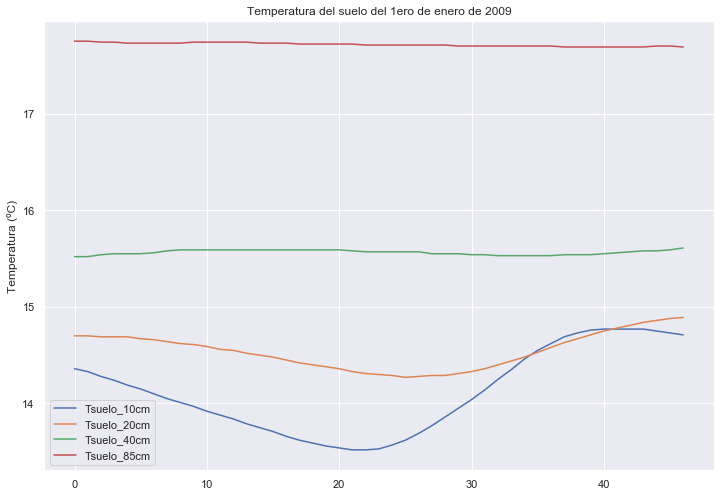

In [36]:
#Temperaturas del suelo par el primero de enero
sb.set(rc={'figure.figsize':(12,8.27)})

fig = plt.figure(); df_graf_suelo.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo del 1ero de enero de 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T_suelo",plt=2000)

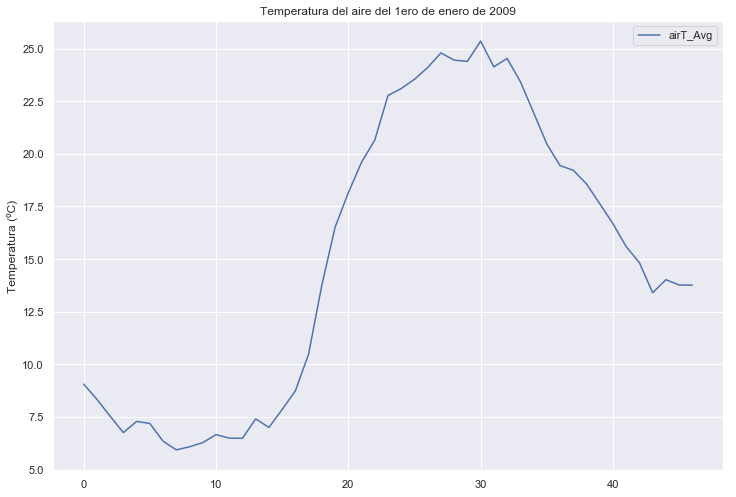

In [37]:
#Temperatura del aire para el primero de enero
sb.set(rc = {'figure.figsize':(12,8.27)})
fig = plt.figure(); df_graf["airT_Avg"].plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire del 1ero de enero de 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T_aire",plt=2000)

In [38]:
#Realizar una gráfica de temperaturas T_max, T_min y T_promedio diarias para el año completo de datos 2009. 

#Creando un nuevo dataframe
df_graf2 = df3

#Haciendo variables para el día y el mes
df_graf2['DIA']=df_graf2['DATETIME'].dt.day
df_graf2['MES']=df_graf2['DATETIME'].dt.month

#Creamos un data frame para cada una de las  4 temperaturas del suelo

#---------------------------------------------------------------------------------------------
#Data frame para Tsuelo_10cm 
df_10=df_graf2.filter(['DIA','MES','Tsuelo_10cm'],axis=1)
#Cálculo de T_max, T_min y T_prom
df_10["Tsuelo_10cm_max"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("max"),decimals=1)
df_10["Tsuelo_10cm_min"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("min"),decimals=1)
df_10["Tsuelo_10cm_prom"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("mean"),decimals=1)
#Eliminando los datos inútiles
df_10 = df_10.drop(['Tsuelo_10cm','DIA','MES'], 1)

#---------------------------------------------------------------------------------------------
#Data frame para Tsuelo_20cm 
df_20=df_graf2.filter(['DIA','MES','Tsuelo_20cm'],axis=1)
#Cálculo de T_max, T_min y T_prom
df_20["Tsuelo_20cm_max"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("max"),decimals=1)
df_20["Tsuelo_20cm_min"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("min"),decimals=1)
df_20["Tsuelo_20cm_prom"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("mean"),decimals=1)
#Eliminando los datos inútiles
df_20 = df_20.drop(['Tsuelo_20cm','DIA','MES'], 1)

#---------------------------------------------------------------------------------------------
#Data frame para Tsuelo_40cm 
df_40=df_graf2.filter(['DIA','MES','Tsuelo_40cm'],axis=1)
#Cálculo de T_max, T_min y T_prom
df_40["Tsuelo_40cm_max"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("max"),decimals=1)
df_40["Tsuelo_40cm_min"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("min"),decimals=1)
df_40["Tsuelo_40cm_prom"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("mean"),decimals=1)
#Eliminando los datos inútiles
df_40 = df_40.drop(['Tsuelo_40cm','DIA','MES'], 1)

#---------------------------------------------------------------------------------------------
#Data frame para Tsuelo_85cm 
df_85=df_graf2.filter(['DIA','MES','Tsuelo_85cm'],axis=1)
#Cálculo de T_max, T_min y T_prom
df_85["Tsuelo_85cm_max"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("max"),decimals=1)
df_85["Tsuelo_85cm_min"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("min"),decimals=1)
df_85["Tsuelo_85cm_prom"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("mean"),decimals=1)
#Eliminando los datos inútiles
df_85 = df_85.drop(['Tsuelo_85cm','DIA','MES'], 1)

<Figure size 864x595.44 with 0 Axes>

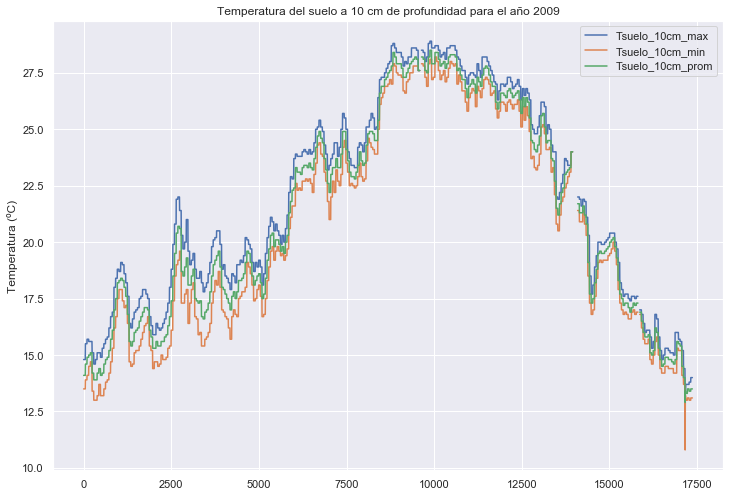

In [39]:
#Gráfica para Tsuelo_10cm
sb.set(rc = {'figure.figsize':(12,8.27)})
fig = plt.figure(); df_10.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10 cm de profundidad para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("Tsuelo_10cm",plt=2000)

<Figure size 864x595.44 with 0 Axes>

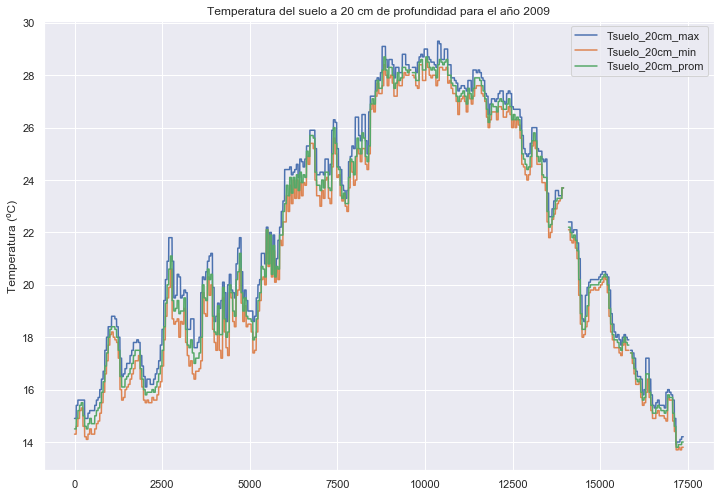

In [40]:
#Gráfica para Tsuelo_20cm
sb.set(rc = {'figure.figsize':(12,8.27)})
fig = plt.figure(); df_20.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 20 cm de profundidad para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("Tsuelo_20cm",plt=2000)

<Figure size 864x595.44 with 0 Axes>

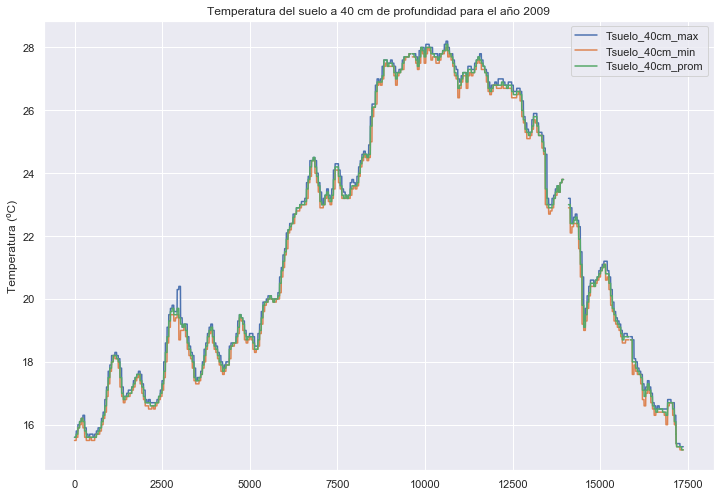

In [41]:
#Gráfica para Tsuelo_40cm
sb.set(rc = {'figure.figsize':(12,8.27)})
fig = plt.figure(); df_40.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 40 cm de profundidad para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("Tsuelo_40cm",plt=2000)

<Figure size 864x595.44 with 0 Axes>

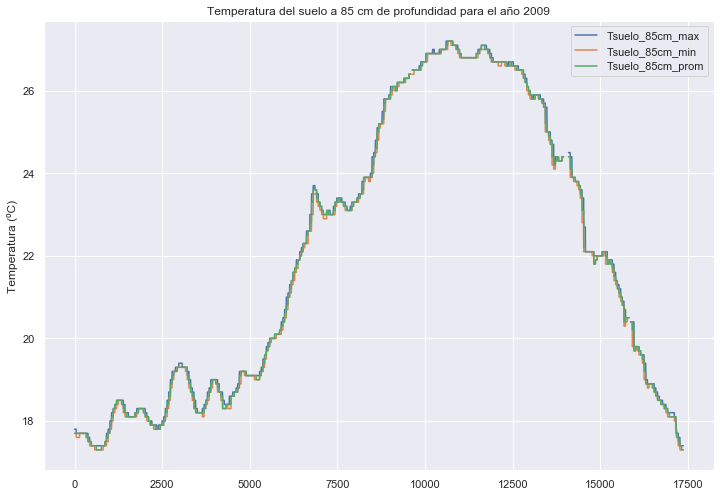

In [42]:
#Gráfica para Tsuelo_85cm
sb.set(rc = {'figure.figsize':(12,8.27)})
fig = plt.figure(); df_85.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 85 cm de profundidad para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("Tsuelo_85cm",plt=2000)

In [43]:
#Gráfica para la temperatura del aire

#Creando un data frame con la temperatura del aire
df_graf2 = df_graf2.filter(['DIA','MES','airT_Avg'],axis=1)

#Convirtiendo los datos a float
df_graf2[df_graf2.columns[1:3]] = df_graf2[df_graf2.columns[1:3]].apply( pd.to_numeric, errors = 'coerce' )

#Uso de la función transform para obtener las temperaturas máxima, mínima y promedio del aire
df_graf2["airT_Avg_max"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("max"),decimals=1)
df_graf2["airT_Avg_min"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("min"),decimals=1)
df_graf2["airT_Avg_prom"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("mean"),decimals=1)

#Eliminando columnas inútiles
df_graf2 = df_graf2.drop(['airT_Avg','DIA','MES'], 1)

<Figure size 864x595.44 with 0 Axes>

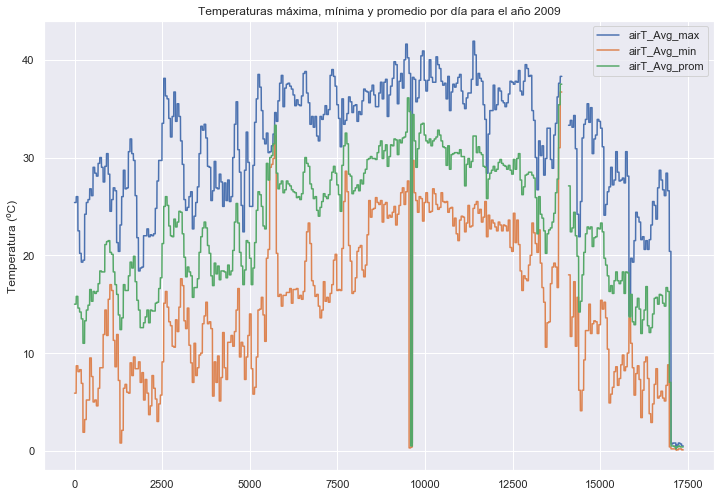

In [44]:
#Gráfica de la temperaturas máxima, mínima y promedio por día para el año 2009
sb.set(rc={'figure.figsize':(12,8.27)})
fig = plt.figure(); df_graf2.plot() ; plt.legend(loc='best')
plt.title("Temperaturas máxima, mínima y promedio por día para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T_aire_2009",plt=2000)

In [45]:
#Calcular el promedio cada 30 minutos durante el día para el mes de Enero de la temperatura del aire 
#y las 8 temperaturas promedio de subsuelo, para posteriormente graficar la variación en 24 horas de las temperaturas de interés.

#Seleccionando únicamente el mes de enero
df_graf3 = df3[df3['DATETIME']<'2009-02-01 00:00:00']

#Seleccionando las temperaturas del suelo
df_graf3_s = df_graf3.filter(['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)

df3.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,...,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,HORA,DIA,MES
0,1.227,0.685,-0.069,10.340,1.224,-175.5,23.61,-26.46,1.421,9.059999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:30,1,1
1,0.885,0.992,-0.167,8.760,1.450,-183.4,23.33,-26.98,1.390,8.340000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:00,1,1
2,0.118,1.321,-0.071,8.690,1.422,-187.8,24.04,-27.16,1.338,7.539001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:30,1,1
3,0.755,1.193,-0.149,7.612,1.360,-174.0,20.87,-21.68,1.457,6.760000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:00,1,1
4,1.080,0.839,-0.149,7.761,1.404,-170.7,18.15,-21.55,1.422,7.288001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:30,1,1


<Figure size 864x595.44 with 0 Axes>

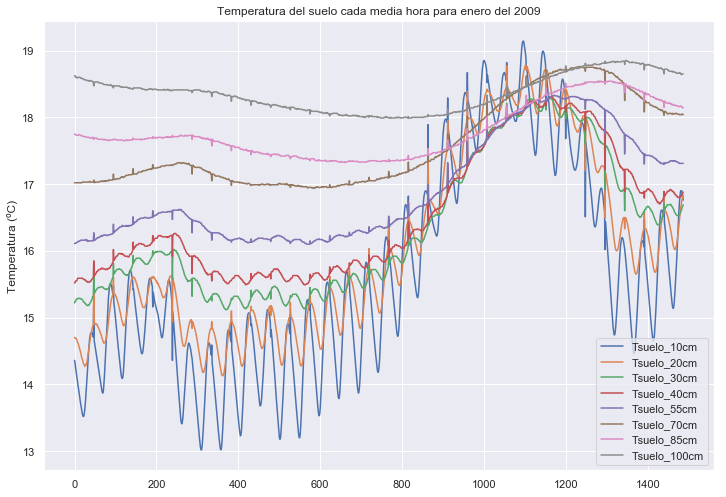

In [46]:
#Gráfica de temperaturas del suelo cada 30 min para el mes de enero del año 2009
sb.set(rc = {'figure.figsize':(12,8.27)})
fig = plt.figure(); df_graf3_s.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo cada media hora para enero del 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T_suelo_enero",plt=2000)

<Figure size 864x595.44 with 0 Axes>

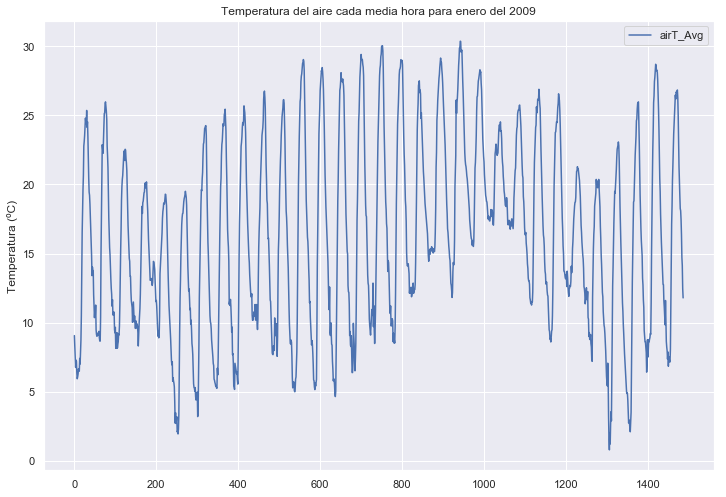

In [47]:
df_graf3 = df_graf3.filter(['airT_Avg'],axis=1)
df_graf3 = df_graf3.apply(pd.to_numeric,errors='coerce')

#Gráfica de la temperatura del aire cada media hora para el mes de enero del año 2009
sb.set(rc={'figure.figsize':(12,8.27)})
fig = plt.figure(); df_graf3.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire cada media hora para enero del 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T_aire_enero",plt=2000)

In [48]:
#Reproducción de las gráficas usando el promedio móvil (rolling mean)

#Añadiendo la variable DATETIME
df_10['DATETIME']=df3['DATETIME']
df_20['DATETIME']=df3['DATETIME']
df_40['DATETIME']=df3['DATETIME']
df_85['DATETIME']=df3['DATETIME']
df_graf2['DATETIME']=df3['DATETIME']


#Dataframe para los promedios móviles
df_10_roll = pd.DataFrame()
df_20_roll = pd.DataFrame()
df_40_roll = pd.DataFrame()
df_85_roll = pd.DataFrame()
df_airT_roll = pd.DataFrame()


#Calculando el promedio móvil de cada temperatura
df_10_roll["max_10"]=df_10.Tsuelo_10cm_max.rolling(60, min_periods=1).mean()
df_10_roll["min_10"]=df_10.Tsuelo_10cm_min.rolling(60, min_periods=1).mean()
df_10_roll["prom_10"]=df_10.Tsuelo_10cm_prom.rolling(60, min_periods=1).mean()

df_20_roll["max_20"]=df_20.Tsuelo_20cm_max.rolling(60, min_periods=1).mean()
df_20_roll["min_20"]=df_20.Tsuelo_20cm_min.rolling(60, min_periods=1).mean()
df_20_roll["prom_20"]=df_20.Tsuelo_20cm_prom.rolling(60, min_periods=1).mean()

df_40_roll["max_40"]=df_40.Tsuelo_40cm_max.rolling(60, min_periods=1).mean()
df_40_roll["min_40"]=df_40.Tsuelo_40cm_min.rolling(60, min_periods=1).mean()
df_40_roll["prom_40"]=df_40.Tsuelo_40cm_prom.rolling(60, min_periods=1).mean()

df_85_roll["max_85"]=df_85.Tsuelo_85cm_max.rolling(60, min_periods=1).mean()
df_85_roll["min_85"]=df_85.Tsuelo_85cm_min.rolling(60, min_periods=1).mean()
df_85_roll["prom_85"]=df_85.Tsuelo_85cm_prom.rolling(60, min_periods=1).mean()

df_airT_roll["max_air"]=df_graf2.airT_Avg_max.rolling(60, min_periods=1).mean()
df_airT_roll["min_air"]=df_graf2.airT_Avg_min.rolling(60, min_periods=1).mean()
df_airT_roll["prom_air"]=df_graf2.airT_Avg_prom.rolling(60, min_periods=1).mean()

<Figure size 864x595.44 with 0 Axes>

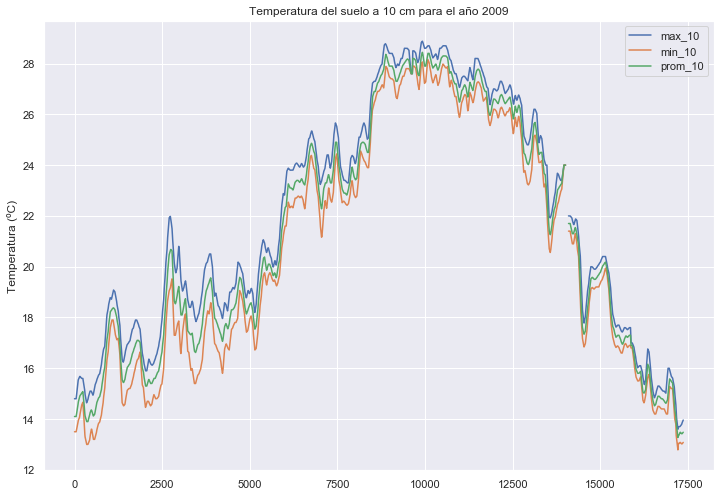

In [49]:
#Gráfica suavizada de la temperatura del suelo a 10cm para el 2009
sb.set(rc={'figure.figsize':(12,8.27)})
fig = plt.figure(); df_10_roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10 cm para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T10_roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

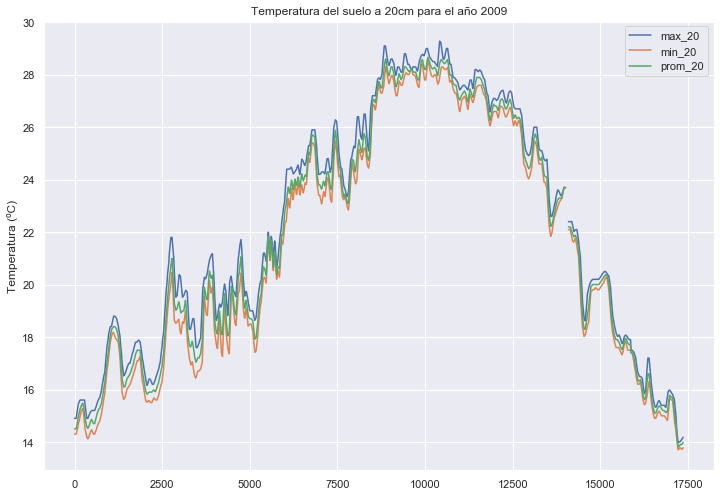

In [50]:
#Gráfica suavizada de la temperatura del suelo a 20 cm para el 2009
sb.set(rc={'figure.figsize':(12,8.27)})
fig = plt.figure(); df_20_roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 20cm para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T20_roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

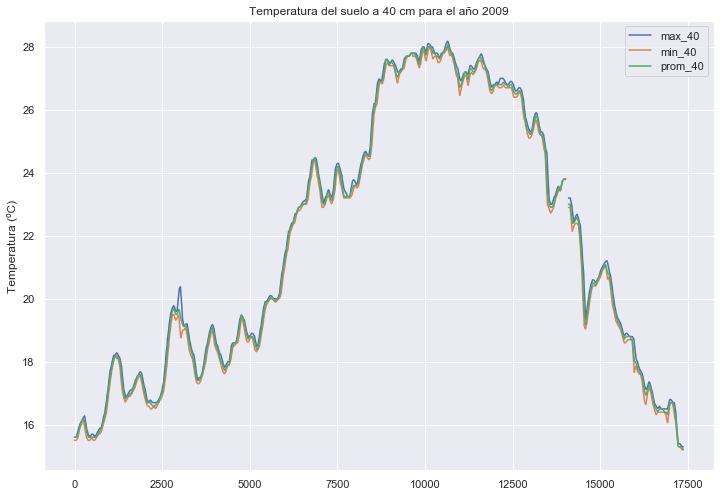

In [51]:
#Gráfica suavizada de la temperatura del suelo a 40 cm para el 2009
sb.set(rc={'figure.figsize':(12,8.27)})
fig = plt.figure(); df_40_roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 40 cm para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T40_roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

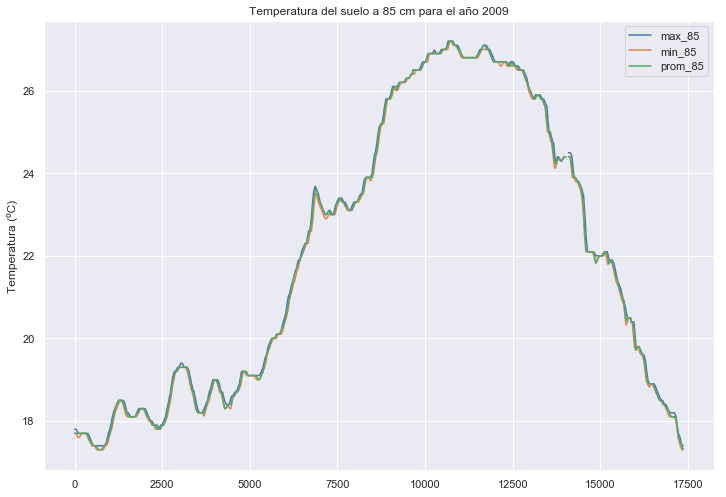

In [52]:
#Gráfica suavizada de la temperatura del suelo a 85 cm para el 2009
sb.set(rc={'figure.figsize':(12,8.27)})
fig = plt.figure(); df_85_roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 85 cm para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("T85_roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

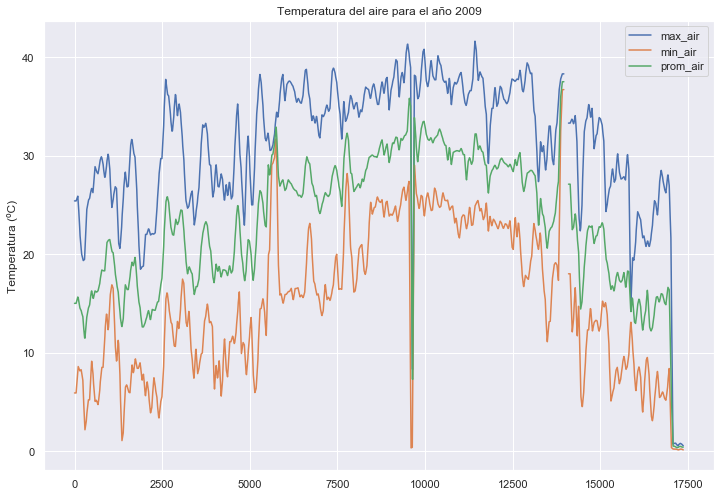

In [53]:
#Gráfica suavizada de la temperatura del aire para el 2009
sb.set(rc={'figure.figsize':(12,8.27)})
fig = plt.figure(); df_airT_roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire para el año 2009")
plt.ylabel("Temperatura (ºC)")
plt.grid(True)

fig.savefig("airT_roll",plt=2000)